# **Model Implementation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

import xgboost as xgb

%matplotlib inline

In [2]:
df = pd.read_csv('data/clean.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [3]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
X = StandardScaler().fit_transform(X)
y = df['median_house_value']
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

X_train.shape

(14025, 8)

### **Linear Regression**

In [4]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

lr_model = LinearRegression()
lr_model_cv = GridSearchCV(lr_model, param_grid, cv=3, n_jobs=-1 , scoring='r2')
lr_model_cv.fit(X_train, y_train)

y_pred_lr = lr_model_cv.predict(X_test)

res = r2_score(y_test, y_pred_lr)
print(res)

score = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', lr_model_cv.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_lr))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_lr))

0.5962764965820406
Cross Val score  [0.43543523 0.49630724 0.55129332 0.5453038  0.65854878] 0.5373776737917617 0.07350911238422109
Best Params to use  {'copy_X': True, 'fit_intercept': False, 'positive': False}
Mean Absolute error: 0.464416
Root Mean Squared error: 0.637428


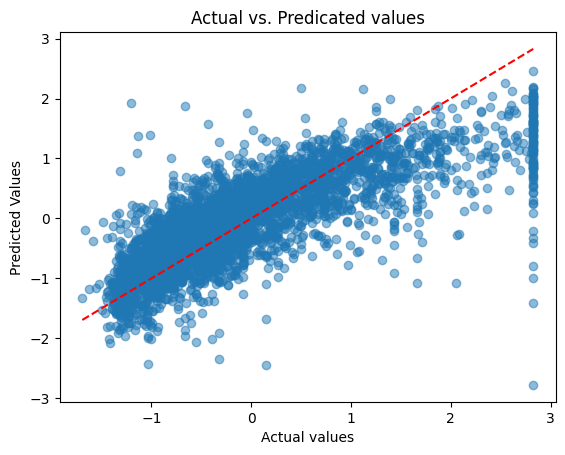

In [5]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **Decision Tree Regressor**

In [6]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_model = DecisionTreeRegressor(random_state=0)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, scoring='r2')
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.predict(X_test)

res_dt = r2_score(y_test, y_pred_dt)
print(res_dt)
score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_dt.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_dt))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_dt))

0.6933578371609208
Cross Val score  [-0.63415206  0.13834936  0.2393883  -0.05001895  0.33088579] 0.004890485898122954 0.34364628682088283
Best Params to use  {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Absolute error: 0.372263
Root Mean Squared error: 0.555527


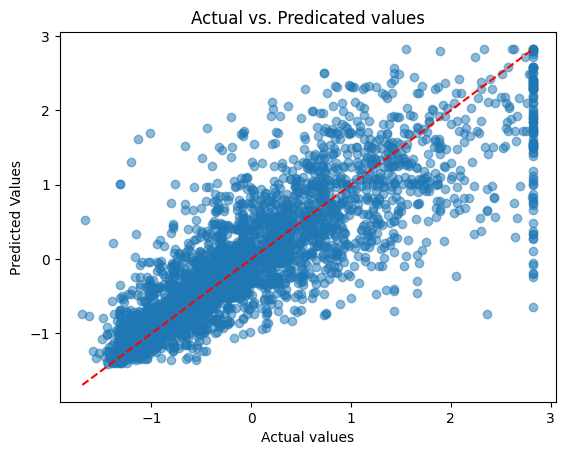

In [7]:
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **Random Forest Regressor**

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20,30,40],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

rf_model = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.predict(X_test)

res = r2_score(y_test, y_pred_rf)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_rf.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_rf))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_rf))

In [ ]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **XGBOOST**

In [ ]:
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [5,6,7],
    'learning_rate': [0.01,0.1,0.2],
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb_model = xgb.XGBRegressor()
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
y_pred_xgb = grid_search_xgb.predict(X_test)

res = r2_score(y_test, y_pred_xgb)
print(res)

score = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_xgb.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_xgb))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_xgb))

In [ ]:
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()